# Decision Trees

Like  SVMs,  Decision  Trees  are  versatile  Machine  Learning  algorithms  that  can  perform  both  classification  and  regression  tasks,  and  even  multioutput  tasks.  They  are powerful  algorithms,  capable  of  fitting  complex  datasets.  Decision  Trees  are  also  the  fundamental  components  of  Random  Forests,  which  are  among  the  most  powerful  Machine  Learning  algorithms  available today. In  this  chapter  we  will  start  by  discussing  how  to  train,  visualize,  and  make  predictions  with  Decision  Trees.  Then  we  will  go  through  the  CART  training  algorithmused  by  Scikit-Learn,  and  we  will  discuss  how  to  regularize  trees  and  use  them  for regression tasks. Finally, we will discuss some of the limitations of Decision Trees.

## Training and Visualizing a Decision Tree

To understand Decision Trees, let’s build one and take a look at how it makes predictions.

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

You  can  visualize  the  trained  Decision  Tree  by  first  using  the  export_graphviz() method to output a graph definition file called iris_tree.dot.

In [15]:
# setup not completed

from graphviz import Source
from sklearn.tree import export_graphviz
import os

IMAGES_PATH = os.path.join("/home/susang/Documents")

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

Then you can use the dot command-line tool from the Graphviz package to convert this  .dot  file  to  a  variety  of  formats,  such  as  PDF  or  PNG. This  command  line  converts the .dot file to a .png image file.

$ dot -Tpng iris_tree.dot -o iris_tree.png

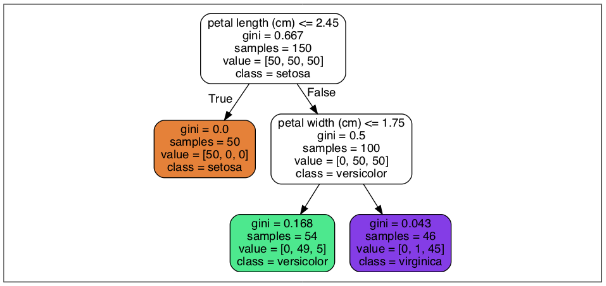

## Making Predictions

Let’s see how the tree represented in Figure above makes predictions. Suppose you find an  iris  flower  and  you  want  to  classify  it.  You  start  at  the  root  node  (depth  0,  at  the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any child nodes), so it does not ask any questions: simply look  at  the  predicted  class  for  that  node,  and  the  Decision  Tree  predicts  that  your flower is an Iris setosa (class=setosa).

Now  suppose  you  find  another  flower,  and  this  time  the  petal  length  is  greater  than 2.45 cm. You must move down to the root’s right child node (depth 1, right), which is not  a  leaf  node,  so  the  node  asks  another  question:  is  the  petal  width  smaller  than 1.75 cm? If it is, then your flower is most likely an Iris versi color (depth 2, left). If not,it is likely an Iris virginica (depth 2, right). It’s really that simple.

One  of  the  many  qualities  of  Decision  Trees  is  that  they  require very  little  data  preparation.  In  fact,  they  don’t  require  feature  scaling or centering at all.

A node’s  samples  attribute  counts  how  many  training  instances  it  applies  to.  For example,  100  training  instances  have  a  petal  length  greater  than  2.45  cm  (depth  1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left). A node’s  value  attribute  tells  you  how  many  training  instances  of  each  class  this  node applies to: for example, the bottom-right node applies to 0 Iris setosa, 1 Iris versicolor,and  45  Iris  virginica.  Finally,  a  node’s  gini  attribute  measures  its  impurity:  a  node  is “pure”  (gini=0)  if  all  training  instances  it  applies  to  belong  to  the  same  class.  For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure  and  its  gini  score  is  0.  Equation below shows  how  the  training  algorithm  computes the gini score G<sub>i</sub> of the i<sup>th</sup> node. The depth-2 left node has a gini score equal to1 – (0/54)<sup>2</sup> – (49/54)<sup>2</sup> – (5/54)<sup>2</sup> ≈ 0.168

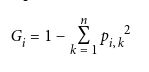

In this equation:
- p<sub>i,k</sub> is the ratio of class k instances among the training instances in the i<sup>th</sup> node.

Scikit-Learn uses the CART algorithm, which produces only binary trees:  nonleaf  nodes  always  have  two  children  (i.e.,  questions  only have  yes/no  answers).  However,  other  algorithms  such  as  ID3  can produce  Decision  Trees  with  nodes  that  have  more  than  twochildren